# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import citipy
print("Citipy imported successfully")

Citipy imported successfully


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"


In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | kourou
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | rongelap
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | selkirk
Processing Record 9 of Set 1 | okhotsk
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | dharamsala
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | arthur's town
City not found. Skipping...
Processing Record 14 of Set 1 | santuario
Processing Record 15 of Set 1 | chegdomyn
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | muisne
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | ziro
Processing Record 21 of Set 1 | dwarka
Processing Record 22 of Set 1 | newport beach
Proce

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.71,99,100,5.66,TF,1735878748
1,yellowknife,62.4560,-114.3525,-34.69,75,0,3.09,CA,1735878749
2,crane,31.3974,-102.3501,13.69,20,0,3.64,US,1735878750
3,kourou,5.1552,-52.6478,24.12,95,71,2.25,GF,1735878751
4,constantia,44.1833,28.6500,1.50,61,22,4.47,RO,1735878753


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.71,99,100,5.66,TF,1735878748
1,yellowknife,62.4560,-114.3525,-34.69,75,0,3.09,CA,1735878749
2,crane,31.3974,-102.3501,13.69,20,0,3.64,US,1735878750
3,kourou,5.1552,-52.6478,24.12,95,71,2.25,GF,1735878751
4,constantia,44.1833,28.6500,1.50,61,22,4.47,RO,1735878753


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
print(city_data_df.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


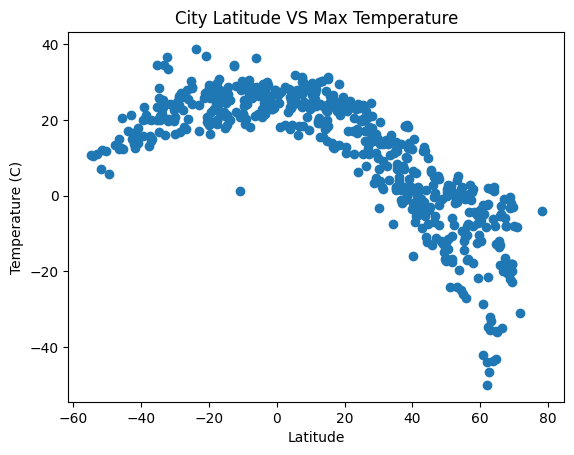

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Max Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

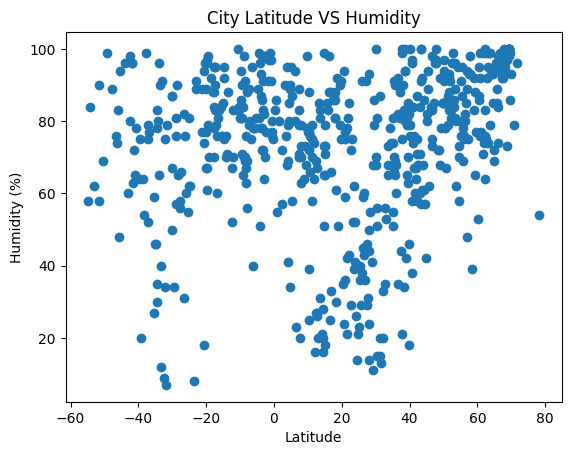

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

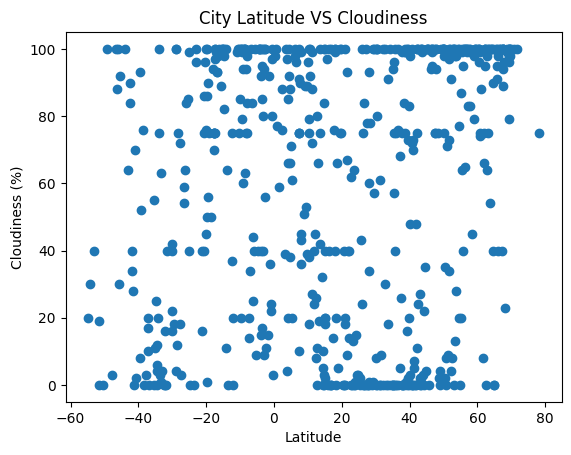

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

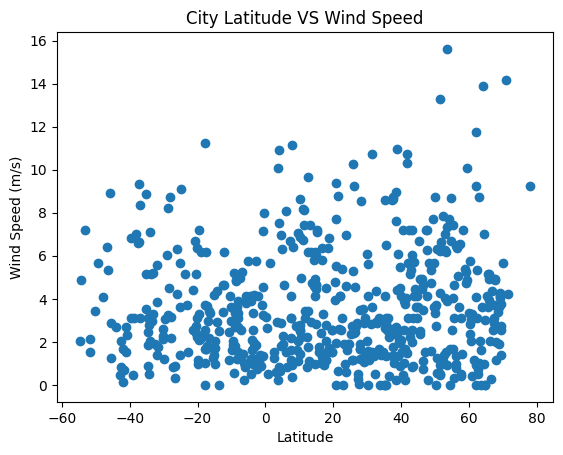

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def linregress_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Calculate the regression line
    regression_line = x * slope + intercept

    # Calculate r^2 value
    r_squared = rvalue**2
  
    line_equation = f"y = {round(slope,2)}x + {round(intercept, 2)}"

    # Create the plot
    plt.scatter(x, y, color = "blue", label = "Data points", marker = "o")
    plt.plot(x, regression_line, color = "red", label=f"Regression line ($R^2$ = {r_squared:.2f})")
    plt.annotate(line_equation, (x.min() , y.min()), color = "r", fontsize = 12)
    plt.tight_layout()

    # Return r^2 value for future plots
    return r_squared


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-34.69,75,0,3.09,CA,1735878749
2,crane,31.3974,-102.3501,13.69,20,0,3.64,US,1735878750
3,kourou,5.1552,-52.6478,24.12,95,71,2.25,GF,1735878751
4,constantia,44.1833,28.6500,1.50,61,22,4.47,RO,1735878753
5,rongelap,11.1635,166.8941,27.27,75,88,8.16,MH,1735878754


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.71,99,100,5.66,TF,1735878748
14,ushuaia,-54.8000,-68.3000,10.81,58,20,2.06,AR,1735878672
17,puerto ayora,-0.7393,-90.3518,23.64,97,24,1.34,EC,1735878612
25,katima mulilo,-17.5000,24.2667,19.93,95,100,1.66,NaN,1735878777
26,waitangi,-43.9535,-176.5597,17.12,96,100,2.68,NZ,1735878778


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7401681962719947


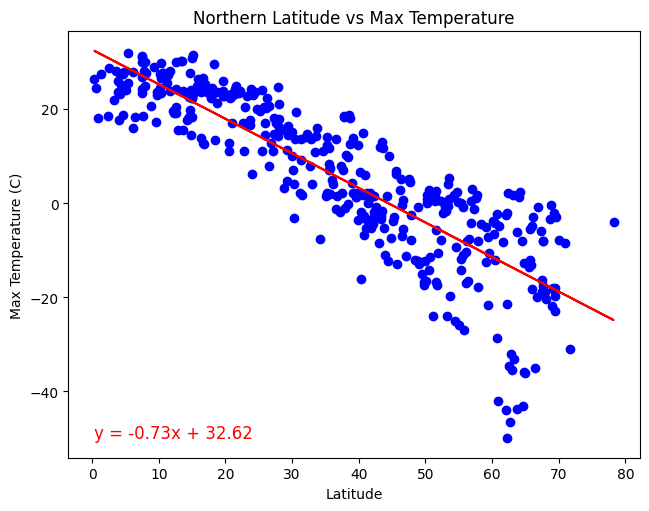

In [19]:
# Linear regression on Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Latitude vs Max Temperature")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.2985674732386505


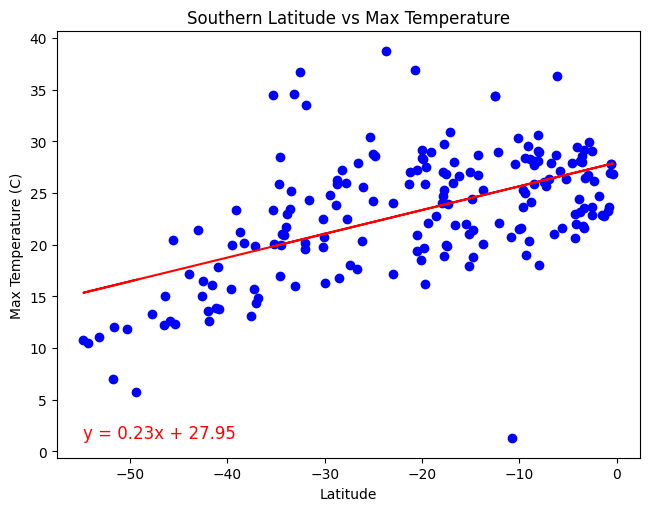

In [20]:
# Linear regression on Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Latitude vs Max Temperature")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:**

The plots suggest that cities closer to the equator tend to have higher max temperature.

-The northern hemisphere has a strong negative correlation with a r-value of 0.74.

-The sourthern hemisphere has a weak positive correlation with a r-value of 0.30.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.16529377712726523


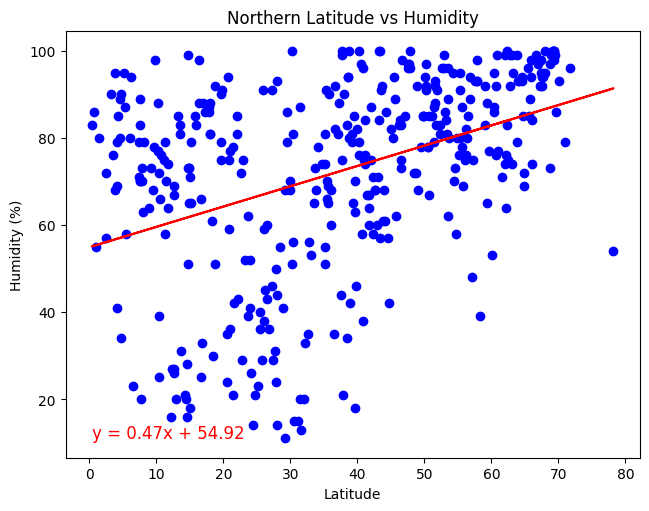

In [27]:
# Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Latitude vs Humidity")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.07275986042747178


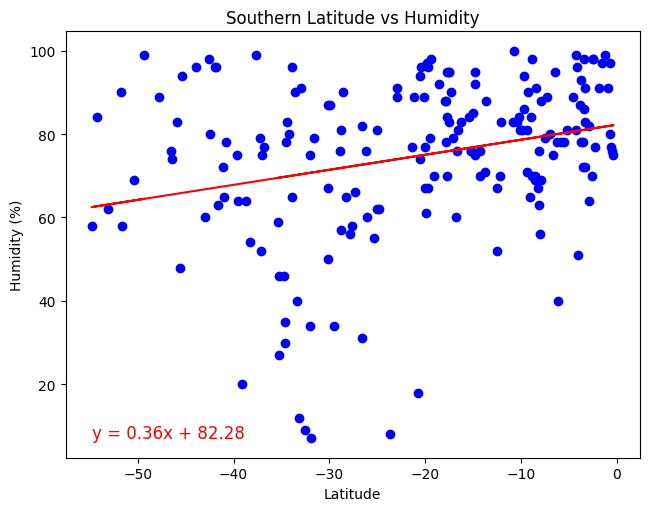

In [28]:
# Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Latitude vs Humidity")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:**

The plots suggest an extremely weak correlation between latitude and humidity in the northern and southern hemispheres, with r-values of 0.17 and 0.07, respectively.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06637843315759112


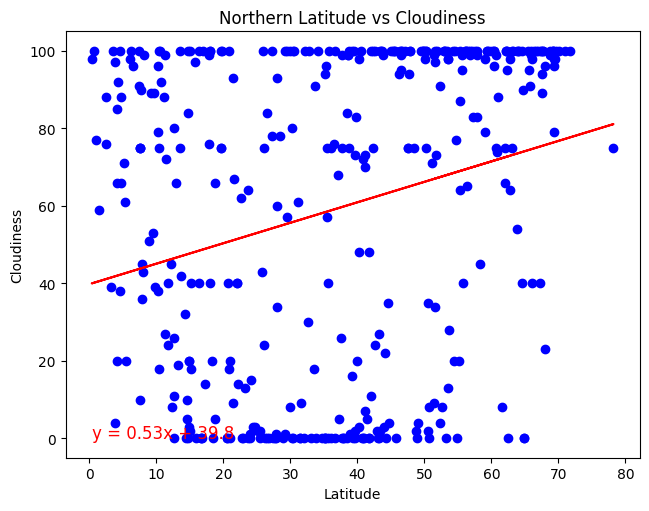

In [23]:
# Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Latitude vs Cloudiness")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.11290919564297636


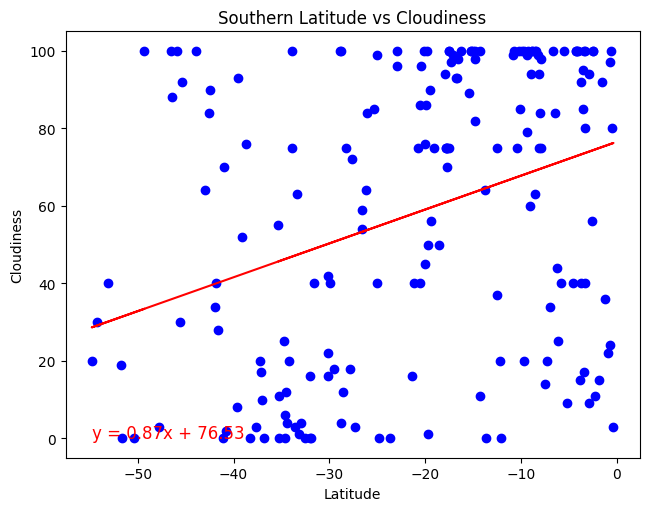

In [24]:
# Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Latitude vs Cloudiness")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:**

The plots suggest no correlation between latitude and cloudiness in the northern and southern hemisphere, despite having r-values of 0.07 and 0.11, respectively, 


### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0020322632145124606


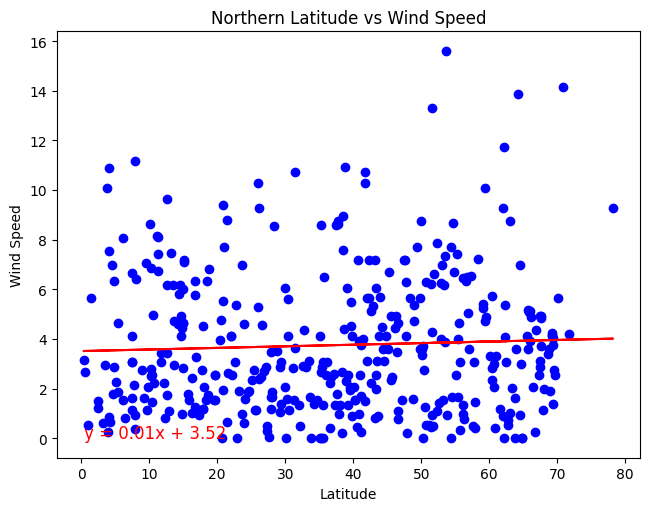

In [25]:
# Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Latitude vs Wind Speed")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.026047852706478337


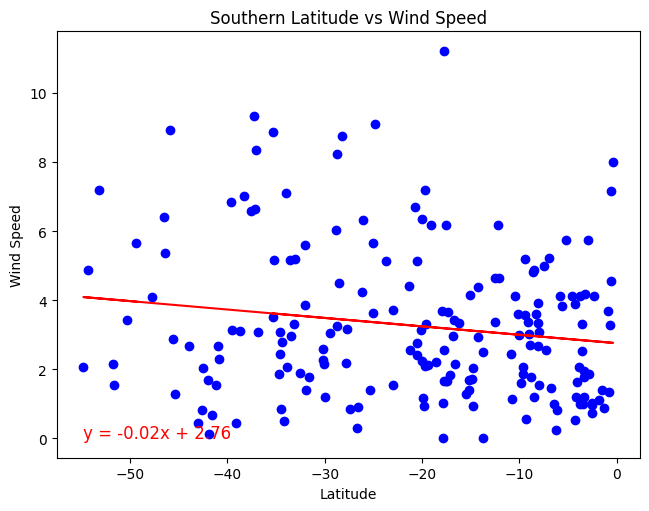

In [26]:
# Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Latitude vs Wind Speed")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:**

The plots suggest an extremely weak correlation between latitude and wind speed in the northern and southern hemispheres,  with r-values of 0.002 and 0.03, respectively, 